# Data Modeling
---

In [ ]:
# --------------------
# Import Libraries
# --------------------
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.stats import chi2_contingency
from kmodes.kmodes import KModes


sns.set_theme()

### Reading The Cleaned Dataset

In [4]:
# --------------
# Read The Data
# --------------
data = pd.read_csv('../data/processed/mentalhealthData_Cleaned.csv')

In [5]:
data.head()

,gender,country,occupation,self_employed,family_mh_history,sought_treatment,days_spent_indoors,noticed_growing_stress,noticed_habit_changes,personal_mh_history,mood_swings,coping_difficulty,work_engagement,social_difficulty,disclose_mh_to_employer,care_options_awareness
0,Female,United States,Corporate,Unknown,No,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Not Sure
1,Female,United States,Corporate,Unknown,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,Unknown,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


### One-Hot Encoding

In [6]:
categorical_cols = [
    'gender', 'country', 'occupation', 'self_employed',
    'family_mh_history', 'sought_treatment',
    'days_spent_indoors', 'noticed_growing_stress',
    'noticed_habit_changes', 'personal_mh_history',
    'mood_swings', 'coping_difficulty',
    'work_engagement', 'social_difficulty',
    'disclose_mh_to_employer', 'care_options_awareness'
]

In [7]:
ohe = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore'
)

X_ohe = ohe.fit_transform(data[categorical_cols])

In [8]:
X_ohe = pd.DataFrame(
    X_ohe,
    columns=ohe.get_feature_names_out(categorical_cols),
    index=data.index
)

In [9]:
X_ohe.head()

,gender_Female,gender_Male,country_Australia,country_Belgium,country_Bosnia And Herzegovina,country_Brazil,country_Canada,country_Colombia,country_Costa Rica,country_Croatia,...,work_engagement_Yes,social_difficulty_Maybe,social_difficulty_No,social_difficulty_Yes,disclose_mh_to_employer_Maybe,disclose_mh_to_employer_No,disclose_mh_to_employer_Yes,care_options_awareness_No,care_options_awareness_Not Sure,care_options_awareness_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [10]:
features = X_ohe.copy()

In [11]:
print(features.shape)

(290051, 80)


## Kmeans Clustering
---

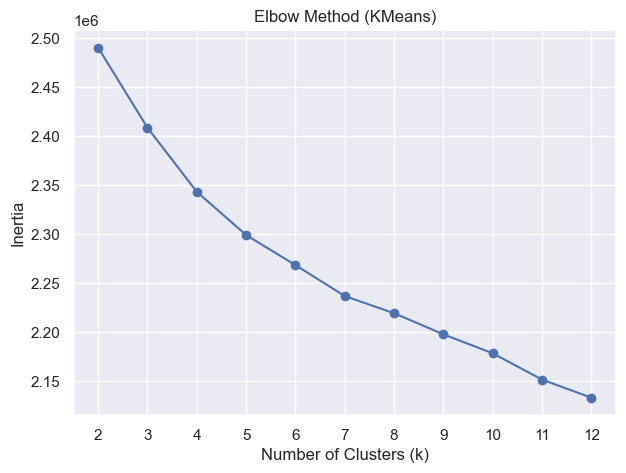

In [12]:
# --------------------------------------------------------------------------------
# Determine Optimal Number of Clusters (k) using Elbow Method and Silhouette Score
# --------------------------------------------------------------------------------

max_k = 12
k_values = range(2, max_k + 1)
inertia = []

X = features.values

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        n_init=10,
        random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method (KMeans)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

c:\Users\omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

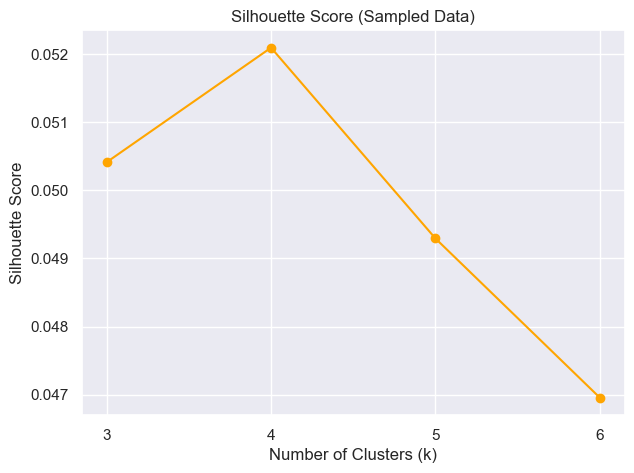

In [13]:
candidate_k = range(3, 7)

# sample ~20–30% or cap at 1000–1500
sample_size = min(1000, X.shape[0])
X_sample = features.sample(
    n=sample_size,
    random_state=42
).values

silhouette_scores = []

for k in candidate_k:
    kmeans = KMeans(
        n_clusters=k,
        n_init=10,
        random_state=42
    )
    labels = kmeans.fit_predict(X_sample)
    sil = silhouette_score(X_sample, labels)
    silhouette_scores.append(sil)

plt.figure(figsize=(7, 5))
plt.plot(candidate_k, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (Sampled Data)')
plt.xticks(candidate_k)
plt.grid(True)
plt.show()


In [14]:
# ---------------------------
# Final Clustering with k= 4
# ---------------------------
FINAL_K = 4

kmeans = KMeans(
    n_clusters=FINAL_K,
    n_init=20,
    random_state=42
)
labels = kmeans.fit_predict(features)

In [15]:
df_kmeans =  data.copy()
df_kmeans['cluster'] = labels

In [16]:
df_kmeans['cluster'].value_counts().sort_index()

cluster
0    66992
1    76456
2    76575
3    70028
Name: count, dtype: int64

In [17]:
cluster_profiles = (
    df_kmeans
    .groupby('cluster')
    .agg(lambda x: x.value_counts().index[0])
)

cluster_profiles

,gender,country,occupation,self_employed,family_mh_history,sought_treatment,days_spent_indoors,noticed_growing_stress,noticed_habit_changes,personal_mh_history,mood_swings,coping_difficulty,work_engagement,social_difficulty,disclose_mh_to_employer,care_options_awareness
cluster,,,,,,,,,,,,,,,,
0,Male,United States,Student,No,No,No,31-60 Days,No,Yes,No,Low,Yes,Maybe,Maybe,No,No
1,Male,United States,Housewife,No,Yes,Yes,1-14 Days,Maybe,Yes,Maybe,Medium,No,No,Maybe,No,Yes
2,Male,United States,Housewife,No,No,No,1-14 Days,Maybe,Yes,Maybe,Medium,No,No,Maybe,No,No
3,Male,United States,Student,No,Yes,Yes,31-60 Days,Yes,Yes,No,Low,Yes,Maybe,No,No,Yes


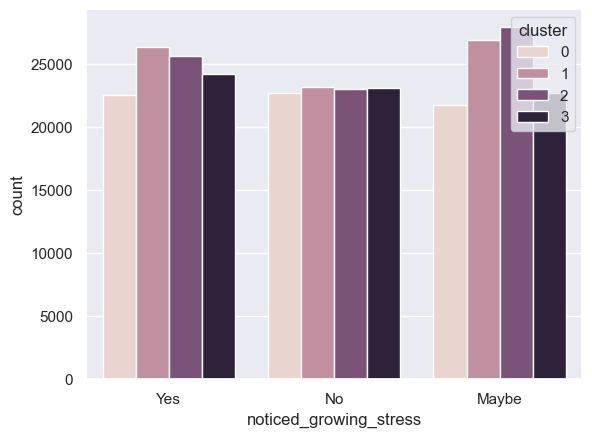

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(
    data=df_kmeans,
    x='noticed_growing_stress',
    hue='cluster'
)
plt.show()

## Hierarchical Clustering
---

In [19]:
sample_size = min(1000, features.shape[0])

X_hier = features.sample(
    n=sample_size,
    random_state=42
).values

In [20]:
Z = linkage(
    X_hier,
    method='ward'
)

In [21]:
clusters_hier = fcluster(
    Z,
    t=4,
    criterion='maxclust'
)

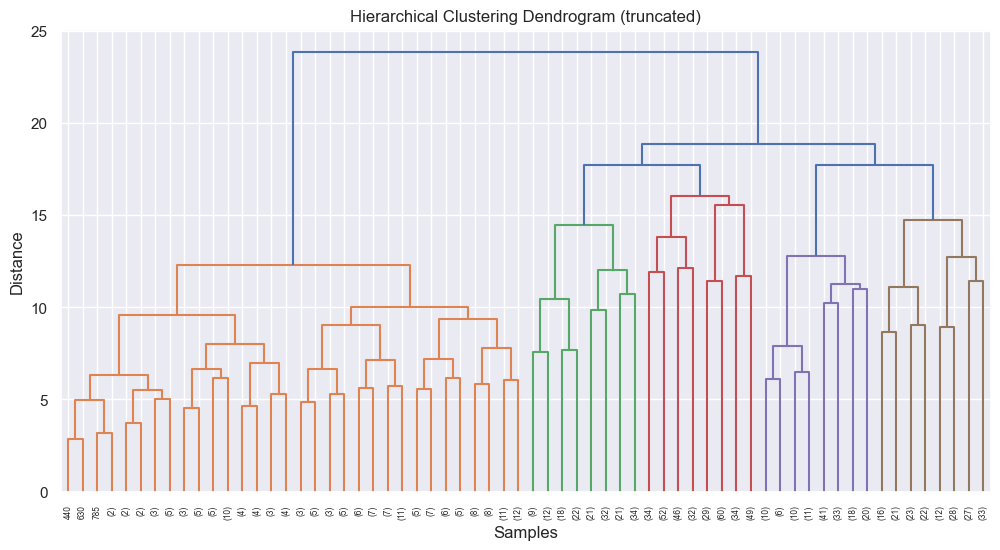

In [22]:
plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode='level',  # prevents clutter
    p=5
)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


## K-Modes Clustering
---

In [23]:
X_cat = data.copy()

In [24]:
X_cat.head()

,gender,country,occupation,self_employed,family_mh_history,sought_treatment,days_spent_indoors,noticed_growing_stress,noticed_habit_changes,personal_mh_history,mood_swings,coping_difficulty,work_engagement,social_difficulty,disclose_mh_to_employer,care_options_awareness
0,Female,United States,Corporate,Unknown,No,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Not Sure
1,Female,United States,Corporate,Unknown,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,Unknown,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [25]:
kmodes = KModes(
    n_clusters=4,
    init='Huang',
    n_init=10,
    verbose=1,
    random_state=42
)

clusters_kmodes = kmodes.fit_predict(X_cat)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 93938, cost: 1966654.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 90756, cost: 1956069.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 71243, cost: 1938267.0
Run 3, iteration: 2/100, moves: 35593, cost: 1938267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 90704, cost: 1958786.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 88273, cost: 1965264.0
Run 5, iteration: 2/100, moves: 17388, cost: 1965264.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 95286, cost: 1920935.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


In [26]:
df_kmodes = X_cat.copy()
df_kmodes['cluster'] = clusters_kmodes

In [27]:
df_kmodes['cluster'].value_counts().sort_index()

cluster
0    100253
1     66266
2     68790
3     54742
Name: count, dtype: int64

In [28]:
cluster_modes = pd.DataFrame(
    kmodes.cluster_centroids_,
    columns=X_cat.columns
)

cluster_modes

,gender,country,occupation,self_employed,family_mh_history,sought_treatment,days_spent_indoors,noticed_growing_stress,noticed_habit_changes,personal_mh_history,mood_swings,coping_difficulty,work_engagement,social_difficulty,disclose_mh_to_employer,care_options_awareness
0,Male,United States,Housewife,No,No,No,1-14 Days,Yes,No,Yes,Low,No,Maybe,Maybe,No,No
1,Male,United States,Housewife,No,Yes,Yes,More Than 2 Months,Maybe,Maybe,Yes,High,Yes,Yes,No,No,Yes
2,Male,United States,Corporate,No,No,No,31-60 Days,No,Maybe,No,High,Yes,No,Maybe,No,No
3,Male,United States,Student,No,Yes,Yes,1-14 Days,Yes,Yes,No,Medium,No,No,No,No,Yes


### Compare Between K-Means and K-Modes

In [29]:
from sklearn.metrics import adjusted_rand_score

ari_kmeans_kmodes = adjusted_rand_score(
    df_kmeans['cluster'],
    df_kmodes['cluster']
)
ari_kmeans_kmodes

0.15759239706868233

## Cluster Analysis
---

In [30]:
df_analysis = df_kmeans.copy()

In [31]:
df_analysis.head()

,gender,country,occupation,self_employed,family_mh_history,sought_treatment,days_spent_indoors,noticed_growing_stress,noticed_habit_changes,personal_mh_history,mood_swings,coping_difficulty,work_engagement,social_difficulty,disclose_mh_to_employer,care_options_awareness,cluster
0,Female,United States,Corporate,Unknown,No,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Not Sure,1
1,Female,United States,Corporate,Unknown,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,No,1
2,Female,United States,Corporate,Unknown,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,1
3,Female,United States,Corporate,No,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,1
4,Female,United States,Corporate,No,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,1


In [32]:
df_analysis['cluster'].value_counts().sort_index()

cluster
0    66992
1    76456
2    76575
3    70028
Name: count, dtype: int64

In [48]:
features = [
    'noticed_growing_stress',
    'noticed_habit_changes',
    'mood_swings',
    'coping_difficulty',
    'social_difficulty',
    'sought_treatment',
    'work_engagement'
]

for feature in features:
    print("\n==============================")
    print(f"Feature: {feature}")
    print("==============================")
    
    table = pd.crosstab(
        df_analysis['cluster'],
        df_analysis[feature],
        normalize='index'
    )
    
    print(table)



Feature: noticed_growing_stress
noticed_growing_stress     Maybe        No       Yes
cluster                                             
0                       0.324278  0.339026  0.336697
1                       0.351810  0.302945  0.345244
2                       0.364962  0.300516  0.334522
3                       0.324599  0.329782  0.345619

Feature: noticed_habit_changes
noticed_habit_changes     Maybe        No       Yes
cluster                                            
0                      0.300872  0.327621  0.371507
1                      0.341242  0.285131  0.373627
2                      0.346745  0.273601  0.379654
3                      0.306892  0.318087  0.375021

Feature: mood_swings
mood_swings      High       Low    Medium
cluster                                  
0            0.319979  0.354669  0.325352
1            0.312742  0.325795  0.361463
2            0.301730  0.331949  0.366321
3            0.314888  0.358085  0.327026

Feature: coping_difficulty
cop

In [ ]:
mh_features = [
    'noticed_growing_stress',
    'noticed_habit_changes',
    'mood_swings',
    'coping_difficulty',
    'social_difficulty',
    'sought_treatment'
]

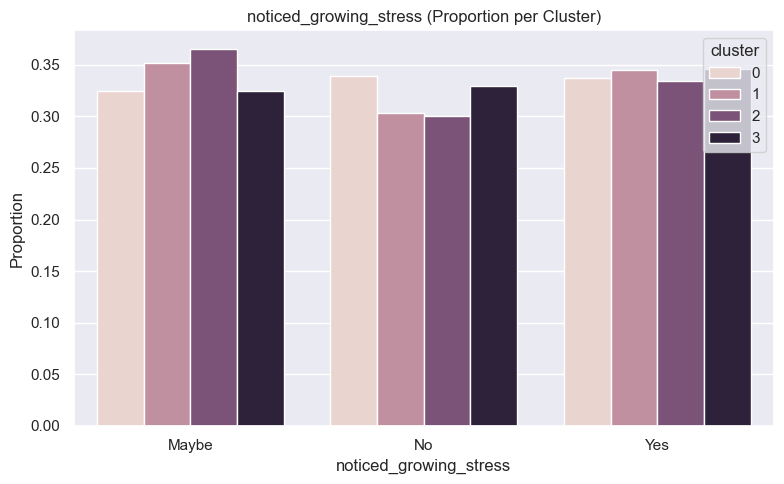

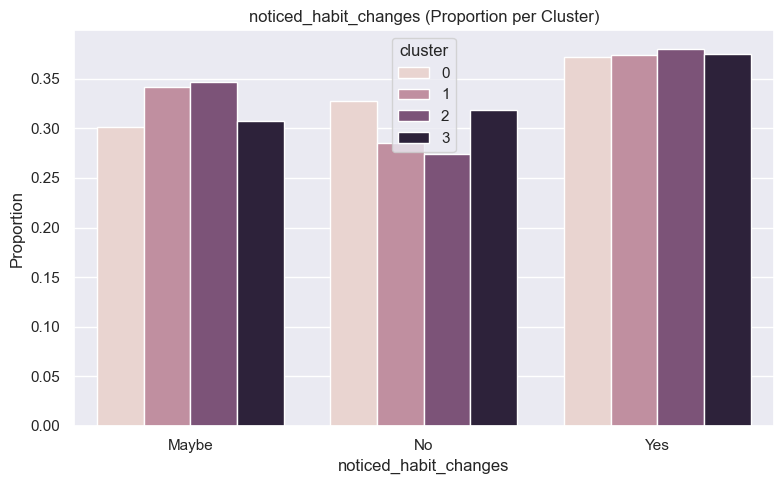

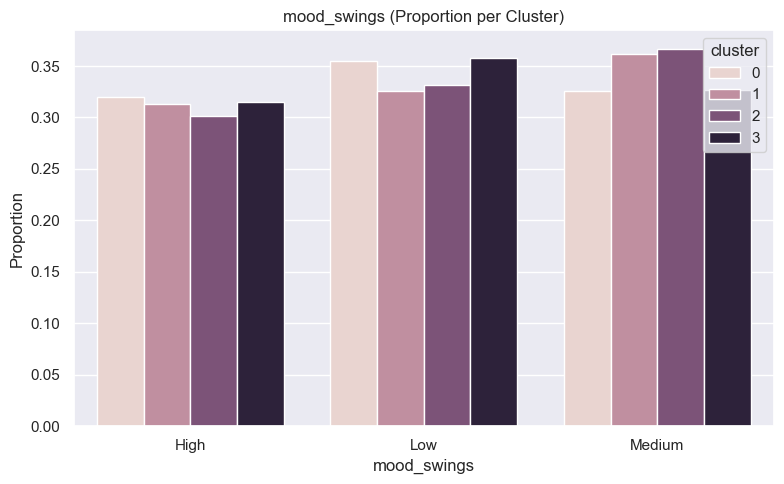

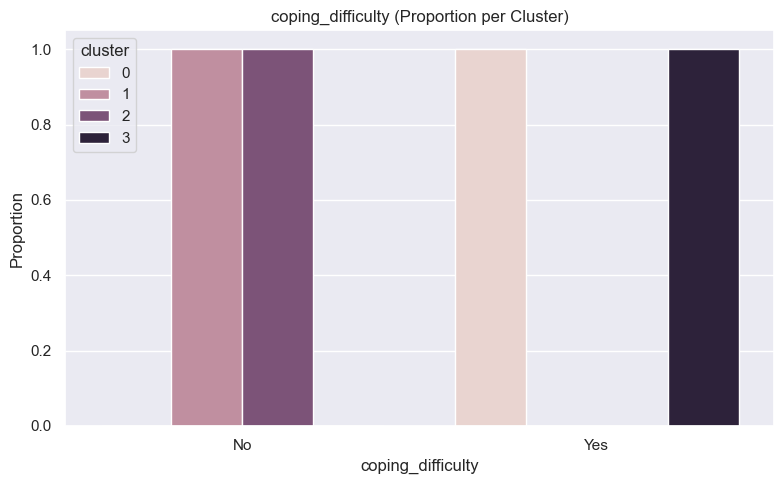

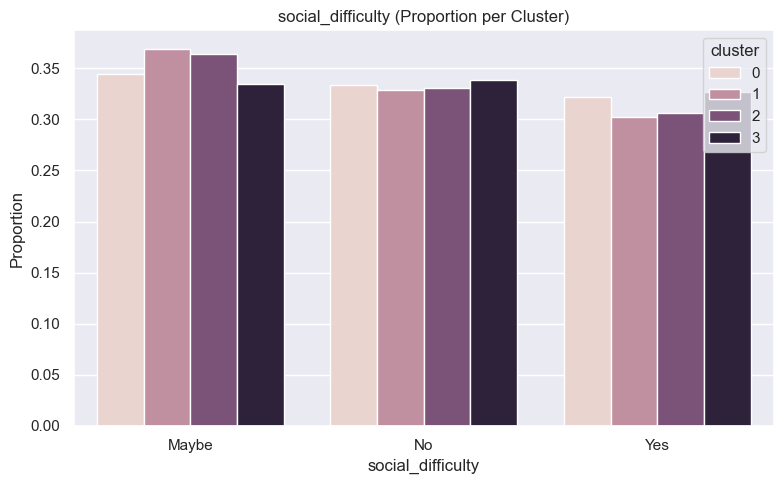

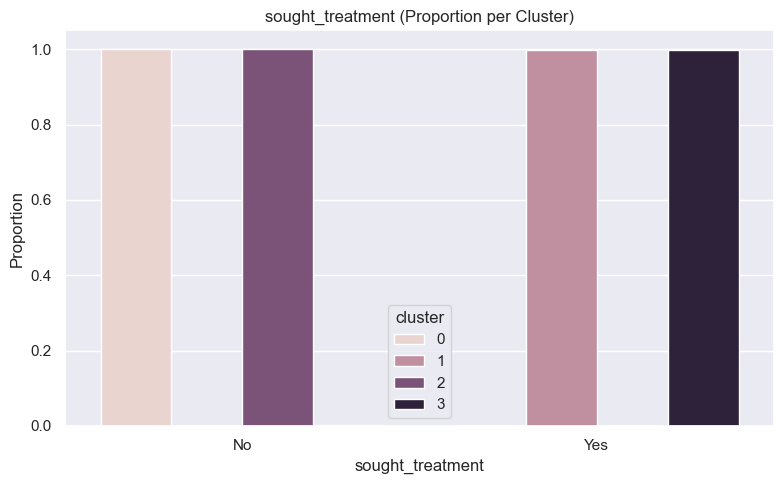

In [47]:
for feature in mh_features:
    prop_df = (
        pd.crosstab(
            df_analysis[feature],
            df_analysis['cluster'],
            normalize='columns'
        )
        .reset_index()
        .melt(
            id_vars=feature,
            var_name='cluster',
            value_name='proportion'
        )
    )

    plt.figure(figsize=(8, 5))
    
    sns.barplot(
        data=prop_df,
        x=feature,
        y='proportion',
        hue='cluster'
    )
    
    plt.title(f'{feature} (Proportion per Cluster)')
    plt.ylabel('Proportion')
    plt.tight_layout()
    plt.show()


Cluster 0 – Struggling Silently
- Reports coping difficulty
- Does not seek treatment
- Moderate stress indicators
- Balanced mood distribution

Cluster 1 – Proactive Care
- No coping difficulty
- Has sought treatment
- Moderate engagement

Cluster 2 – Self-Managing
- No coping difficulty
- No treatment seeking
- Balanced stress indicators

Cluster 3 – Supported but Challenged
- Reports coping difficulty
- Has sought treatment
- Moderate engagement

In [50]:
features = [
    'noticed_growing_stress',
    'noticed_habit_changes',
    'mood_swings',
    'coping_difficulty',
    'social_difficulty',
    'sought_treatment',
    'work_engagement'
]

for feature in features:
    table = pd.crosstab(df_analysis[feature], df_analysis['cluster'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{feature}: p-value = {p}")


noticed_growing_stress: p-value = 1.5945767656824383e-112
noticed_habit_changes: p-value = 8.129930572651088e-181
mood_swings: p-value = 2.7613610606693735e-106
coping_difficulty: p-value = 0.0
social_difficulty: p-value = 2.8903586562580593e-54
sought_treatment: p-value = 0.0
work_engagement: p-value = 9.351725065586176e-128


| Cluster | Coping Difficulty | Treatment | Short Label              |
| ------- | ----------------- | --------- | ------------------------ |
| 0       | Yes               | No        | Struggling Silently      |
| 1       | No                | Yes       | Proactive Care           |
| 2       | No                | No        | Self-Managing            |
| 3       | Yes               | Yes       | Supported but Challenged |


In [ ]:
joblib.dump(kmeans, "../models/kmeans_model.pkl")
joblib.dump(ohe, "../models/encoder.pkl")
joblib.dump(features.columns.tolist(), "../models/feature_columns.pkl")